# Comprehensive Pollution Control ML Project - Custom Dataset Implementation
# Author: Pollution Analysis System
# Objective: Analyze your specific water and air quality datasets to identify pollution sources and control measures


🌍 POLLUTION CONTROL ML ANALYSIS
Loading and cleaning your datasets...
✅ Water quality data loaded with latin-1 encoding: (1991, 12)
✅ Air quality data loaded: (29531, 16)
Air data columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
✅ Air data cleaned successfully!
✅ Water data cleaned successfully!

AIR QUALITY MACHINE LEARNING ANALYSIS

🚀 RUNNING COMPLETE ML PIPELINE FOR AIR QUALITY

🔧 PREPARING DATA FOR MACHINE LEARNING (AIR)
🎯 Target Variable: AQI (Air Quality Index)
📊 Feature Variables: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
📈 Total Features: 12
📝 Dataset shape after removing NaN targets: (24529, 12)
🎯 Target variable range: 13.00 to 588.00

🔍 Missing Values Analysis:
   PM2.5: 1119 (4.6%)
   PM10: 7144 (29.1%)
   NO: 918 (3.7%)
   NO2: 729 (3.0%)
   NOx: 2280 (9.3%)
   NH3: 6576 (26.8%)
   CO: 710 (2.9%)
   SO2: 971 (4.0%)
   O3: 1115 (

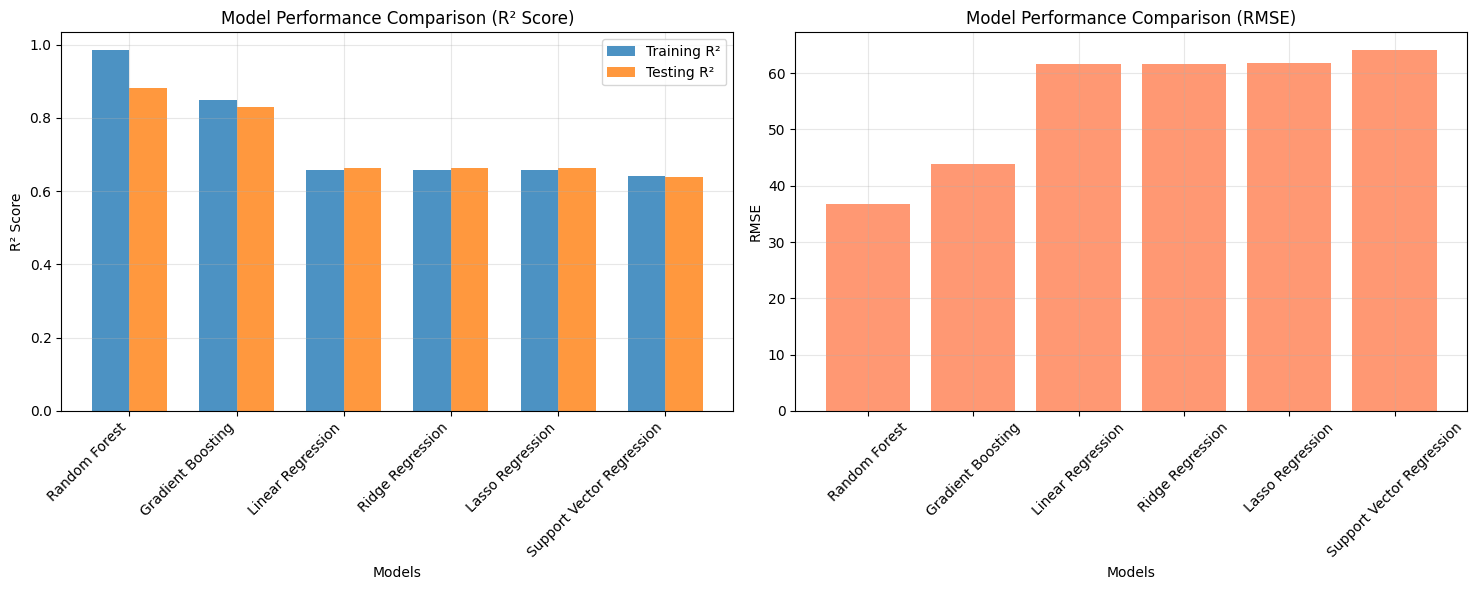

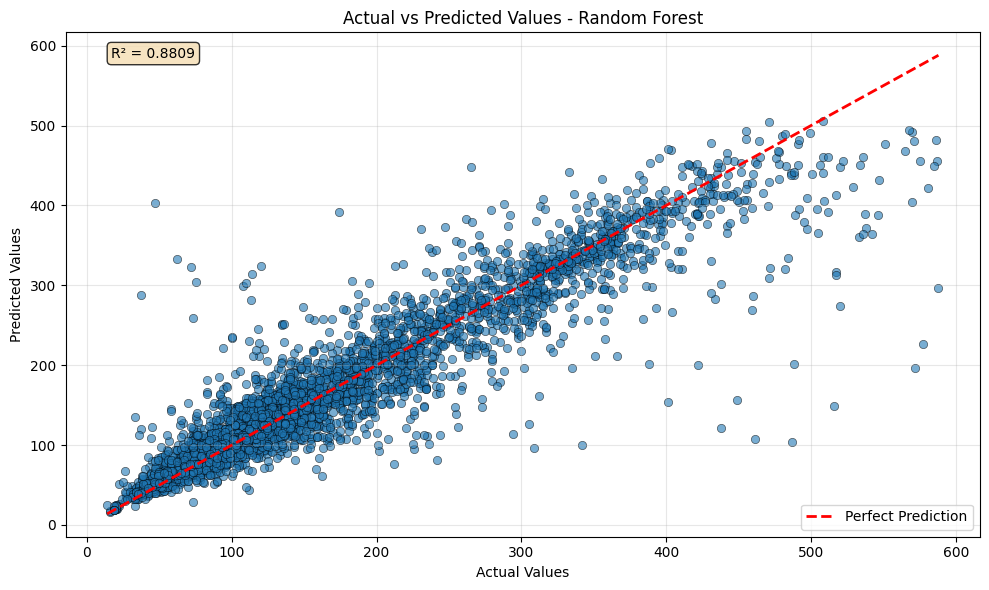

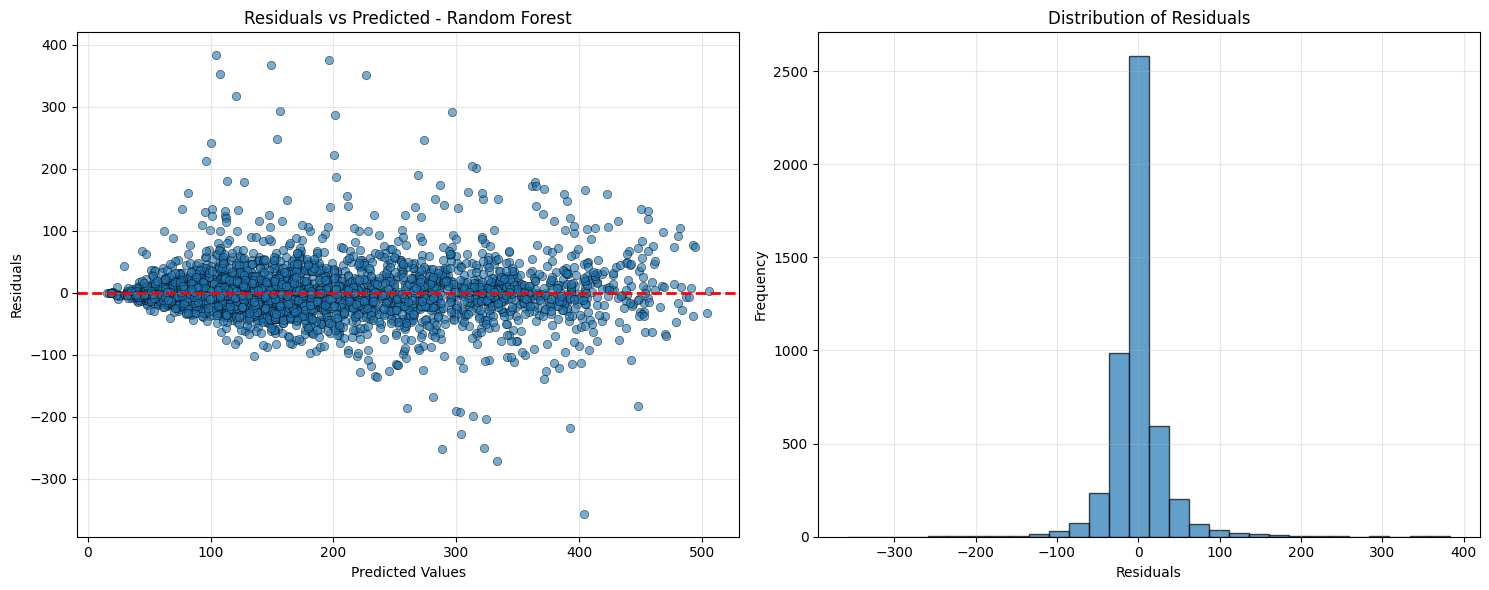

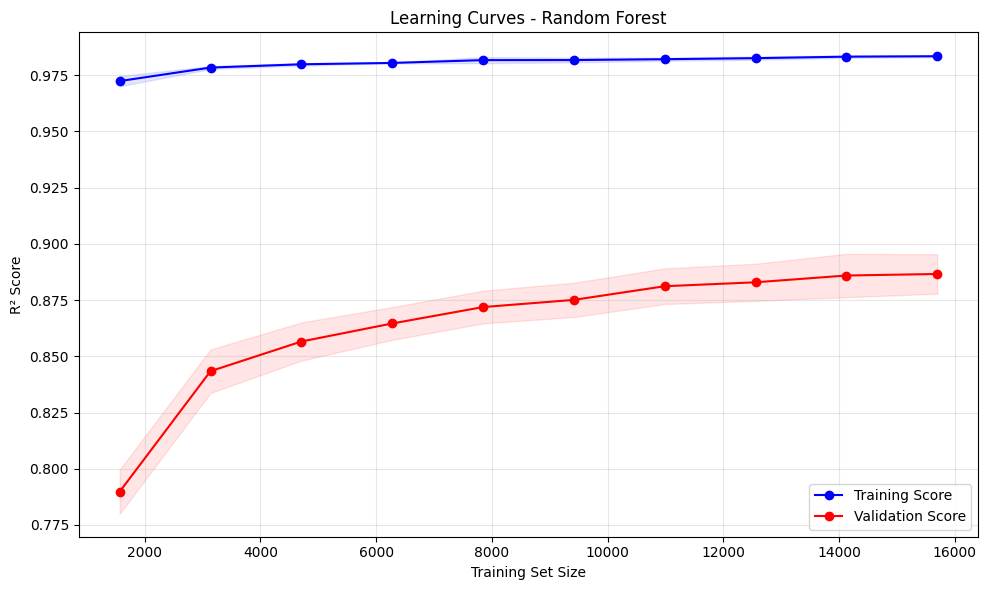


🔍 FEATURE IMPORTANCE ANALYSIS
Using Random Forest for feature importance analysis

📊 Feature Importance Rankings:
   PM2.5: 0.5125
   PM10: 0.1481
   CO: 0.1247
   NO: 0.0435
   Toluene: 0.0420
   NO2: 0.0280
   NOx: 0.0244
   SO2: 0.0232
   O3: 0.0165
   Xylene: 0.0134
   Benzene: 0.0130
   NH3: 0.0106


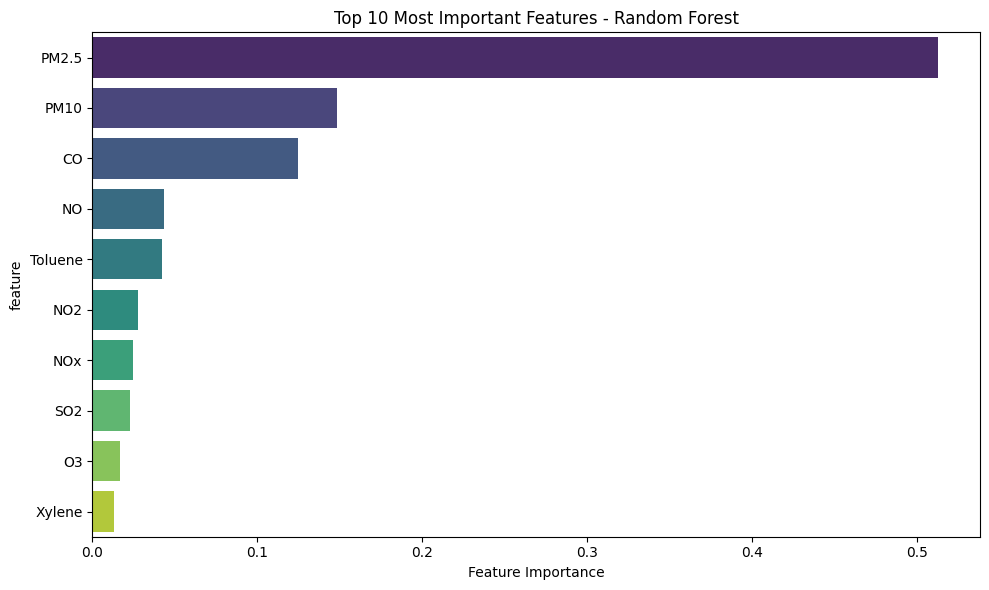


✅ Complete ML pipeline finished for air quality prediction!

WATER QUALITY MACHINE LEARNING ANALYSIS

🚀 RUNNING COMPLETE ML PIPELINE FOR WATER QUALITY

🔧 PREPARING DATA FOR MACHINE LEARNING (WATER)
🎯 Target Variable: STATION CODE
📊 Feature Variables: ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean', 'year']
📈 Total Features: 9
📝 Dataset shape after removing NaN targets: (1869, 9)
🎯 Target variable range: 2.00 to 3473.00

🔍 Missing Values Analysis:
   Temp: 45 (2.4%)
   D.O. (mg/l): 67 (3.6%)
   PH: 10 (0.5%)
   CONDUCTIVITY (µmhos/cm): 72 (3.9%)
   B.O.D. (mg/l): 53 (2.8%)
   NITRATENAN N+ NITRITENANN (mg/l): 244 (13.1%)
   FECAL COLIFORM (MPN/100ml): 295 (15.8%)
   TOTAL COLIFORM (MPN/100ml)Mean: 124 (6.6%)

📊 TRAIN/TEST SPLIT
------------------------------
✅ Training set: 1495 samples (80.0%)
✅ Testing set: 374 samples (20.0%)
✅ Features scaled using StandardSc

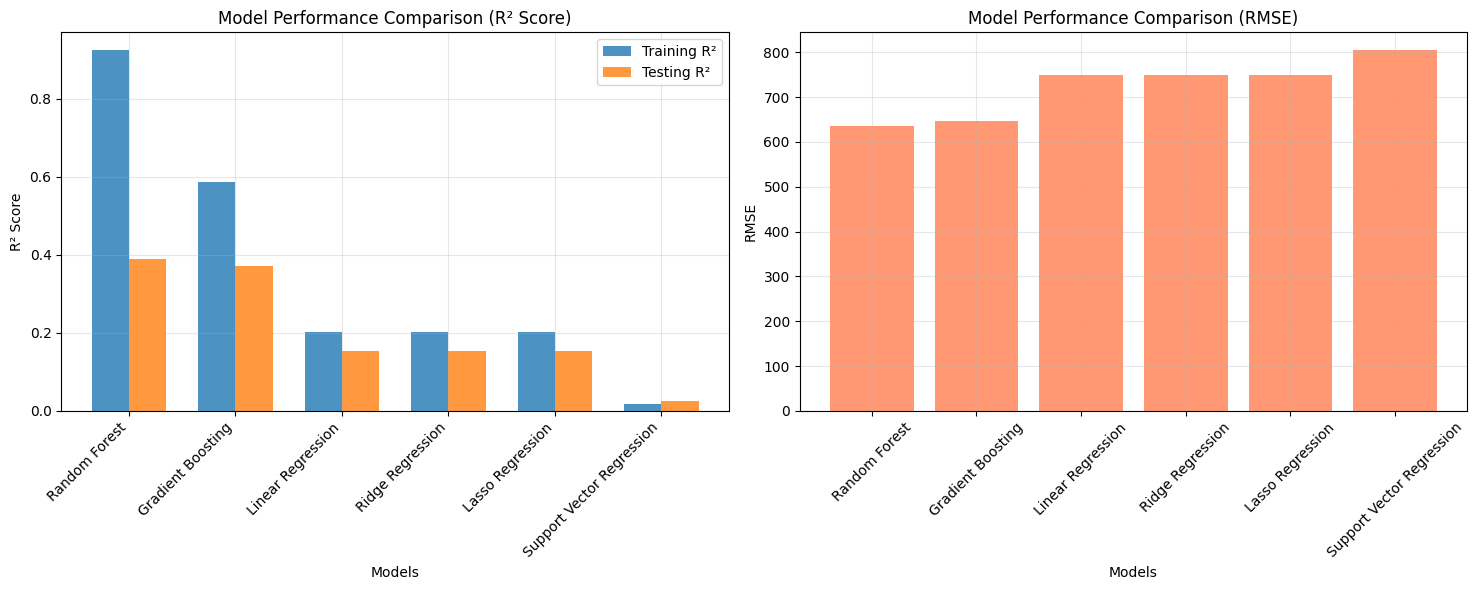

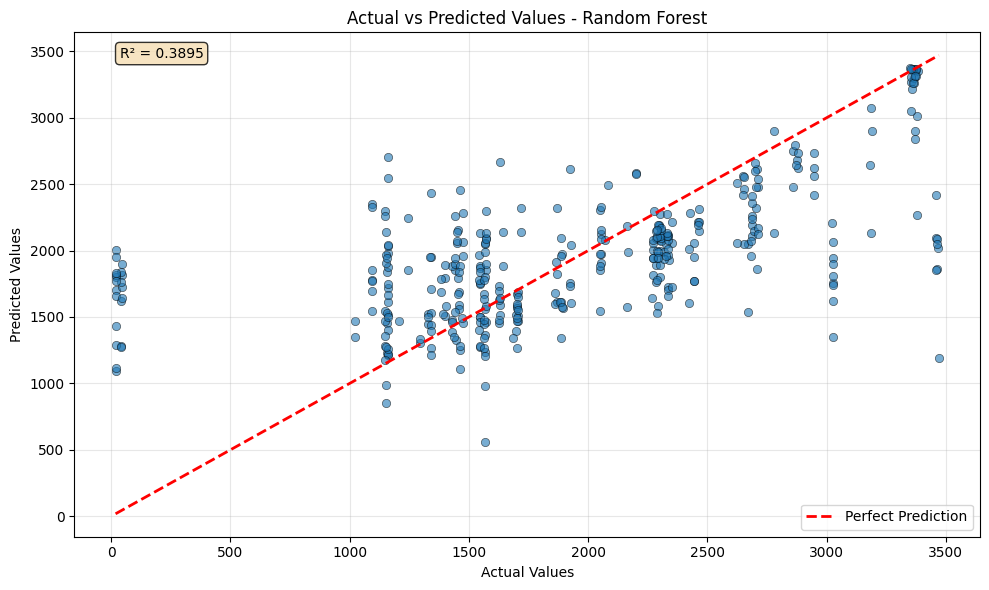

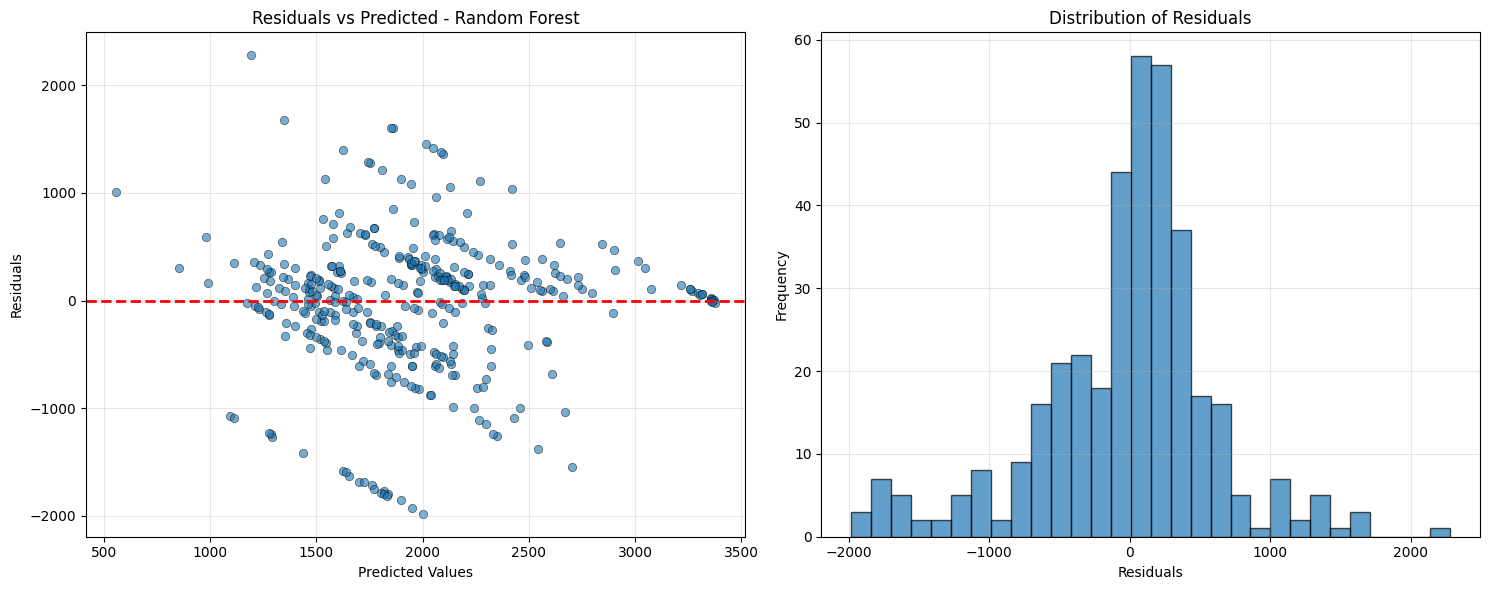

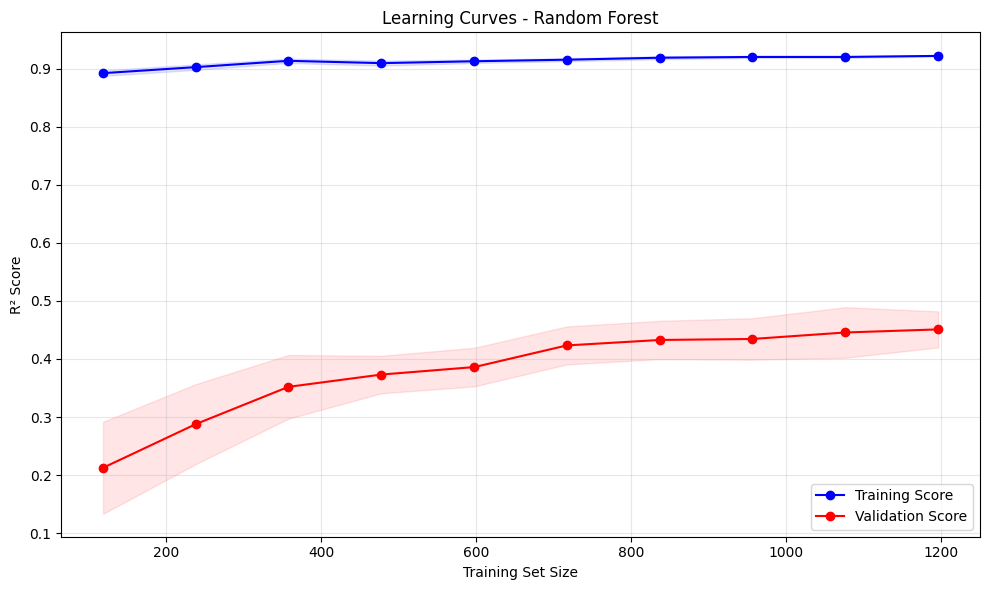


🔍 FEATURE IMPORTANCE ANALYSIS
Using Random Forest for feature importance analysis

📊 Feature Importance Rankings:
   year: 0.2053
   TOTAL COLIFORM (MPN/100ml)Mean: 0.1507
   CONDUCTIVITY (µmhos/cm): 0.1345
   NITRATENAN N+ NITRITENANN (mg/l): 0.1017
   Temp: 0.1004
   B.O.D. (mg/l): 0.0921
   FECAL COLIFORM (MPN/100ml): 0.0829
   PH: 0.0711
   D.O. (mg/l): 0.0614


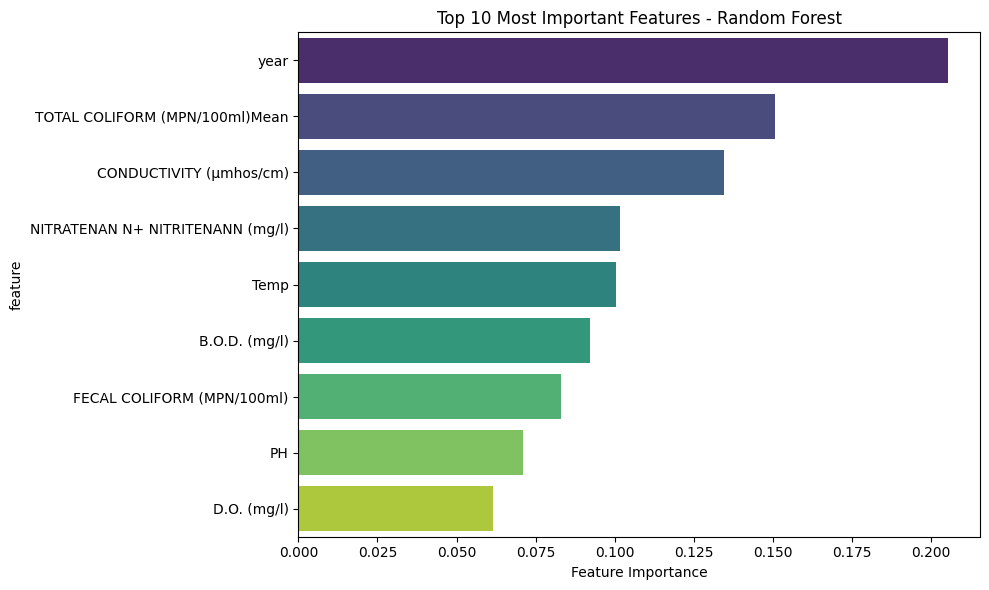


✅ Complete ML pipeline finished for water quality prediction!

🎉 COMPLETE ANALYSIS FINISHED!


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error, 
                           classification_report, accuracy_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

class PollutionControlMLSystem:
    def __init__(self):
        self.air_data = None
        self.water_data = None
        self.models = {}
        self.model_scores = {}
        self.scalers = {}
        self.imputers = {}
        self.feature_names = {}
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def load_and_clean_data(self):
        """Load and clean the pollution datasets"""
        print("Loading and cleaning your datasets...")
        
        # Try to load water quality data with different encodings
        water_encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
        water_loaded = False
        
        for encoding in water_encodings:
            try:
                self.water_data = pd.read_csv('water_quality.csv', encoding=encoding)
                print(f"✅ Water quality data loaded with {encoding} encoding: {self.water_data.shape}")
                water_loaded = True
                break
            except (UnicodeDecodeError, FileNotFoundError) as e:
                if encoding == water_encodings[-1]:
                    print(f"❌ Error loading water data: {str(e)}")
                continue
        
        # Load air quality data
        try:
            self.air_data = pd.read_csv('air_quality.csv')
            print(f"✅ Air quality data loaded: {self.air_data.shape}")
            print(f"Air data columns: {list(self.air_data.columns)}")
        except FileNotFoundError:
            print("❌ Error: air_quality.csv not found")
            return False
        
        # Clean the datasets
        if self.air_data is not None:
            self.air_data = self._clean_air_data()
            print("✅ Air data cleaned successfully!")
        
        if water_loaded and self.water_data is not None:
            self.water_data = self._clean_water_data()
            print("✅ Water data cleaned successfully!")
        
        return True
    
    def _clean_air_data(self):
        """Clean air quality dataset"""
        df = self.air_data.copy()
        
        # Convert Date column to datetime if it exists
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        # Handle numeric columns - convert to numeric and handle outliers
        numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 
                       'Benzene', 'Toluene', 'Xylene', 'AQI']
        
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                # Remove extreme outliers (beyond 3 standard deviations)
                if df[col].std() > 0:
                    mean_val = df[col].mean()
                    std_val = df[col].std()
                    df.loc[df[col] > mean_val + 3*std_val, col] = np.nan
                    df.loc[df[col] < mean_val - 3*std_val, col] = np.nan
        
        # Reset index to ensure clean indexing
        df = df.reset_index(drop=True)
        return df
    
    def _clean_water_data(self):
        """Clean water quality dataset"""
        df = self.water_data.copy()
        
        # Identify numeric columns (excluding obvious categorical ones)
        categorical_keywords = ['name', 'location', 'city', 'state', 'country', 'type', 'category']
        numeric_cols = []
        
        for col in df.columns:
            if not any(keyword in col.lower() for keyword in categorical_keywords):
                # Try to convert to numeric
                temp_series = pd.to_numeric(df[col], errors='coerce')
                if not temp_series.isna().all():  # If conversion produced some numeric values
                    numeric_cols.append(col)
        
        # Clean numeric columns
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Remove extreme outliers
            if df[col].std() > 0:
                mean_val = df[col].mean()
                std_val = df[col].std()
                df.loc[df[col] > mean_val + 3*std_val, col] = np.nan
                df.loc[df[col] < mean_val - 3*std_val, col] = np.nan
        
        # Reset index to ensure clean indexing
        df = df.reset_index(drop=True)
        return df
    
    def prepare_ml_data(self, dataset_type='air'):
        """
        Prepare data for machine learning with clear train/test split
        """
        print(f"\n🔧 PREPARING DATA FOR MACHINE LEARNING ({dataset_type.upper()})")
        print("="*60)
        
        if dataset_type == 'air' and self.air_data is not None:
            data = self.air_data
            numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
            
            if 'AQI' in numeric_cols:
                target_col = 'AQI'
                feature_cols = [col for col in numeric_cols if col != 'AQI']
                print(f"🎯 Target Variable: {target_col} (Air Quality Index)")
            else:
                print("❌ AQI column not found for air quality prediction")
                return False
                
        elif dataset_type == 'water' and self.water_data is not None:
            data = self.water_data
            numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
            
            if len(numeric_cols) >= 2:
                target_col = numeric_cols[0]  # Use first numeric column as target
                feature_cols = numeric_cols[1:]
                print(f"🎯 Target Variable: {target_col}")
            else:
                print("❌ Insufficient numeric columns for water quality prediction")
                return False
        else:
            print(f"❌ No {dataset_type} data available")
            return False
        
        print(f"📊 Feature Variables: {feature_cols}")
        print(f"📈 Total Features: {len(feature_cols)}")
        
        # Extract features and target
        X = data[feature_cols].copy()
        y = data[target_col].copy()
        
        # Remove rows where target is NaN
        valid_indices = ~y.isna()
        X = X.loc[valid_indices].reset_index(drop=True)
        y = y.loc[valid_indices].reset_index(drop=True)
        
        print(f"📝 Dataset shape after removing NaN targets: {X.shape}")
        print(f"🎯 Target variable range: {y.min():.2f} to {y.max():.2f}")
        
        # Handle missing values in features
        print(f"\n🔍 Missing Values Analysis:")
        missing_counts = X.isnull().sum()
        for col in missing_counts.index:
            if missing_counts[col] > 0:
                pct = (missing_counts[col] / len(X)) * 100
                print(f"   {col}: {missing_counts[col]} ({pct:.1f}%)")
        
        # Impute missing values
        imputer = SimpleImputer(strategy='median')
        X_imputed = pd.DataFrame(
            imputer.fit_transform(X), 
            columns=X.columns,
            index=X.index
        )
        
        # Train/Test Split
        print(f"\n📊 TRAIN/TEST SPLIT")
        print("-" * 30)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_imputed, y, test_size=0.2, random_state=42, stratify=None
        )
        
        print(f"✅ Training set: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
        print(f"✅ Testing set: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")
        
        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Store for later use
        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.scalers[dataset_type] = scaler
        self.imputers[dataset_type] = imputer
        self.feature_names[dataset_type] = feature_cols
        
        print(f"✅ Features scaled using StandardScaler")
        print(f"✅ Data preparation complete for {dataset_type} quality prediction")
        
        return True
    
    def train_multiple_models(self, dataset_type='air'):
        """
        Train multiple ML models and compare their performance
        """
        print(f"\n🤖 TRAINING MULTIPLE ML MODELS")
        print("="*50)
        
        if self.X_train is None:
            print("❌ Data not prepared. Run prepare_ml_data() first.")
            return False
        
        # Define models to train
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=1.0),
            'Support Vector Regression': SVR(kernel='rbf', C=1.0)
        }
        
        model_results = {}
        
        print("Training models...")
        for name, model in models.items():
            print(f"   🔄 Training {name}...")
            
            try:
                # Train the model
                model.fit(self.X_train, self.y_train)
                
                # Make predictions
                y_train_pred = model.predict(self.X_train)
                y_test_pred = model.predict(self.X_test)
                
                # Calculate metrics
                train_r2 = r2_score(self.y_train, y_train_pred)
                test_r2 = r2_score(self.y_test, y_test_pred)
                train_rmse = np.sqrt(mean_squared_error(self.y_train, y_train_pred))
                test_rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
                test_mae = mean_absolute_error(self.y_test, y_test_pred)
                
                # Cross-validation score
                cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='r2')
                
                model_results[name] = {
                    'model': model,
                    'train_r2': train_r2,
                    'test_r2': test_r2,
                    'train_rmse': train_rmse,
                    'test_rmse': test_rmse,
                    'test_mae': test_mae,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std(),
                    'predictions': y_test_pred
                }
                
                print(f"      ✅ {name} - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")
                
            except Exception as e:
                print(f"      ❌ {name} - Error: {str(e)}")
                continue
        
        self.models[dataset_type] = model_results
        return model_results
    
    def evaluate_models(self, dataset_type='air'):
        """
        Comprehensive model evaluation with visualizations
        """
        print(f"\n📊 MODEL EVALUATION AND COMPARISON")
        print("="*50)
        
        if dataset_type not in self.models or not self.models[dataset_type]:
            print("❌ No trained models found. Run train_multiple_models() first.")
            return
        
        model_results = self.models[dataset_type]
        
        # 1. Model Comparison Table
        print("\n📋 MODEL PERFORMANCE SUMMARY")
        print("-" * 80)
        print(f"{'Model':<25} {'Train R²':<10} {'Test R²':<10} {'Test RMSE':<12} {'CV Score':<15}")
        print("-" * 80)
        
        for name, results in model_results.items():
            print(f"{name:<25} {results['train_r2']:<10.4f} {results['test_r2']:<10.4f} "
                  f"{results['test_rmse']:<12.4f} {results['cv_mean']:.4f}±{results['cv_std']:.4f}")
        
        # Find best model
        best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['test_r2'])
        best_model = model_results[best_model_name]
        print(f"\n🏆 BEST MODEL: {best_model_name}")
        print(f"   Test R² Score: {best_model['test_r2']:.4f}")
        print(f"   Test RMSE: {best_model['test_rmse']:.4f}")
        
        # 2. Visualization: Model Comparison Bar Chart
        self._plot_model_comparison(model_results)
        
        # 3. Visualization: Actual vs Predicted for best model
        self._plot_actual_vs_predicted(best_model_name, best_model)
        
        # 4. Visualization: Residual Plot for best model
        self._plot_residuals(best_model_name, best_model)
        
        # 5. Learning Curves for best model
        self._plot_learning_curves(best_model_name, best_model['model'])
        
        return model_results
    
    def _plot_model_comparison(self, model_results):
        """Plot model comparison chart"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        models = list(model_results.keys())
        train_scores = [model_results[m]['train_r2'] for m in models]
        test_scores = [model_results[m]['test_r2'] for m in models]
        
        # R² Comparison
        x_pos = np.arange(len(models))
        width = 0.35
        
        ax1.bar(x_pos - width/2, train_scores, width, label='Training R²', alpha=0.8)
        ax1.bar(x_pos + width/2, test_scores, width, label='Testing R²', alpha=0.8)
        ax1.set_xlabel('Models')
        ax1.set_ylabel('R² Score')
        ax1.set_title('Model Performance Comparison (R² Score)')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(models, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # RMSE Comparison
        rmse_scores = [model_results[m]['test_rmse'] for m in models]
        ax2.bar(models, rmse_scores, color='coral', alpha=0.8)
        ax2.set_xlabel('Models')
        ax2.set_ylabel('RMSE')
        ax2.set_title('Model Performance Comparison (RMSE)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_actual_vs_predicted(self, model_name, model_results):
        """Plot actual vs predicted values"""
        plt.figure(figsize=(10, 6))
        
        y_test_pred = model_results['predictions']
        
        plt.scatter(self.y_test, y_test_pred, alpha=0.6, edgecolors='black', linewidth=0.5)
        
        # Perfect prediction line
        min_val = min(self.y_test.min(), y_test_pred.min())
        max_val = max(self.y_test.max(), y_test_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted Values - {model_name}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Add R² score to plot
        r2 = model_results['test_r2']
        plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    def _plot_residuals(self, model_name, model_results):
        """Plot residual analysis"""
        y_test_pred = model_results['predictions']
        residuals = self.y_test - y_test_pred
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Residuals vs Predicted
        ax1.scatter(y_test_pred, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
        ax1.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax1.set_xlabel('Predicted Values')
        ax1.set_ylabel('Residuals')
        ax1.set_title(f'Residuals vs Predicted - {model_name}')
        ax1.grid(True, alpha=0.3)
        
        # Residuals histogram
        ax2.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Residuals')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Distribution of Residuals')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_learning_curves(self, model_name, model):
        """Plot learning curves"""
        train_sizes, train_scores, val_scores = learning_curve(
            model, self.X_train, self.y_train, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        
        plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        
        plt.xlabel('Training Set Size')
        plt.ylabel('R² Score')
        plt.title(f'Learning Curves - {model_name}')
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, dataset_type='air'):
        """Analyze feature importance using the best model"""
        print(f"\n🔍 FEATURE IMPORTANCE ANALYSIS")
        print("="*40)
        
        if dataset_type not in self.models or not self.models[dataset_type]:
            print("❌ No trained models found.")
            return None
        
        model_results = self.models[dataset_type]
        
        # Find best model
        best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['test_r2'])
        best_model = model_results[best_model_name]['model']
        
        print(f"Using {best_model_name} for feature importance analysis")
        
        # Get feature importance (works for tree-based models)
        if hasattr(best_model, 'feature_importances_'):
            importance_scores = best_model.feature_importances_
            feature_names = self.feature_names[dataset_type]
            
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': importance_scores
            }).sort_values('importance', ascending=False)
            
            print("\n📊 Feature Importance Rankings:")
            for idx, row in feature_importance.iterrows():
                print(f"   {row['feature']}: {row['importance']:.4f}")
            
            # Visualization
            plt.figure(figsize=(10, 6))
            top_features = feature_importance.head(10)
            sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
            plt.title(f'Top 10 Most Important Features - {best_model_name}')
            plt.xlabel('Feature Importance')
            plt.tight_layout()
            plt.show()
            
            return feature_importance
        else:
            print(f"❌ {best_model_name} doesn't support feature importance analysis")
            return None
    
    def run_complete_ml_pipeline(self, dataset_type='air'):
        """Run the complete ML pipeline"""
        print(f"\n🚀 RUNNING COMPLETE ML PIPELINE FOR {dataset_type.upper()} QUALITY")
        print("="*70)
        
        # Step 1: Prepare data
        if not self.prepare_ml_data(dataset_type):
            return False
        
        # Step 2: Train multiple models
        model_results = self.train_multiple_models(dataset_type)
        if not model_results:
            return False
        
        # Step 3: Evaluate models
        self.evaluate_models(dataset_type)
        
        # Step 4: Feature importance
        self.feature_importance_analysis(dataset_type)
        
        print(f"\n✅ Complete ML pipeline finished for {dataset_type} quality prediction!")
        return True

def run_complete_pollution_ml_analysis():
    """Main function to run the complete ML analysis"""
    print("🌍 POLLUTION CONTROL ML ANALYSIS")
    print("="*50)
    
    # Initialize the system
    system = PollutionControlMLSystem()
    
    # Load and clean data
    if not system.load_and_clean_data():
        print("❌ Failed to load data. Please check your CSV files.")
        return
    
    try:
        # Run complete ML pipeline for air quality
        if system.air_data is not None:
            print("\n" + "="*70)
            print("AIR QUALITY MACHINE LEARNING ANALYSIS")
            print("="*70)
            system.run_complete_ml_pipeline('air')
        
        # Run complete ML pipeline for water quality  
        if system.water_data is not None:
            print("\n" + "="*70)
            print("WATER QUALITY MACHINE LEARNING ANALYSIS") 
            print("="*70)
            system.run_complete_ml_pipeline('water')
        
        print(f"\n🎉 COMPLETE ANALYSIS FINISHED!")
        
    except Exception as e:
        print(f"❌ Analysis failed: {str(e)}")
        import traceback
        traceback.print_exc()

# Run the complete analysis
if __name__ == "__main__":
    run_complete_pollution_ml_analysis()